In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Preparation

## Importing dataset

In [2]:
df = pd.read_csv("data/TitanicMess.tsv", decimal=",", sep="\t", header=0)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic


## Correcting types

In [4]:
df.dtypes

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
ship           object
dtype: object

In [5]:
df["PassengerId"] = df["PassengerId"].apply(str)
df["Survived"] = df["Survived"].apply(str)
df["Pclass"] = df["Pclass"].apply(str)

### Converting to Amercian number system

In [6]:
df["Age"] = df["Age"].str.replace(",", ".")
df["Fare"] = df["Fare"].str.replace(",", ".")

In [7]:
def check_float(value):
    try:
        float(value)
        return np.NaN
    except ValueError:
        return value

### Detecting invalid numeric values

In [8]:
print(df["Age"].apply(check_float).dropna())
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

Series([], Name: Age, dtype: float64)


In [9]:
print(df["Fare"].apply(check_float).dropna())
df["Fare"] = pd.to_numeric(df["Fare"], errors="coerce")

489    15.9a
Name: Fare, dtype: object


In [10]:
df.dtypes

PassengerId     object
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
ship            object
dtype: object

# Exploration

## Finding missing value

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            173
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          685
Embarked         2
ship             0
dtype: int64

<AxesSubplot:>

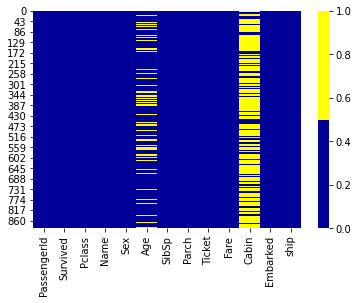

In [12]:
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

**Counting unique values in columns**

In [13]:
df.nunique()

PassengerId    888
Survived         2
Pclass           3
Name           889
Sex              6
Age             93
SibSp            7
Parch            6
Ticket         680
Fare           249
Cabin          145
Embarked         6
ship             1
dtype: int64

## Detecting duplicates

In [14]:
def get_duplicated_rows(df: pd.DataFrame, column: str) -> pd.DataFrame:
    return df[df.duplicated([column], keep=False)]

In [15]:
get_duplicated_rows(df, "PassengerId")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
10,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.7,G6,S,Titanic
13,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.7,G6,S,Titanic
23,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.7,G6,S,Titanic
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S,Titanic
520,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S,Titanic
678,225,1,1,"Hoytt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S,Titanic


In [16]:
get_duplicated_rows(df, "Name")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
10,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.7,G6,S,Titanic
13,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.7,G6,S,Titanic
23,11,1,3,"Sandstrom, Miss. Marguerite Ru&5$$",female,4.0,1,1,PP 9549,16.7,G6,S,Titanic
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S,Titanic
520,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0,C93,S,Titanic


## Detecting invalid valuves

<AxesSubplot:xlabel='Pclass', ylabel='count'>

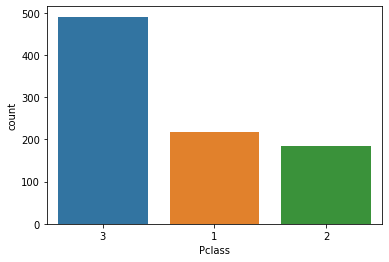

In [17]:
sns.countplot(data=df, x="Pclass")

<AxesSubplot:xlabel='Sex', ylabel='count'>

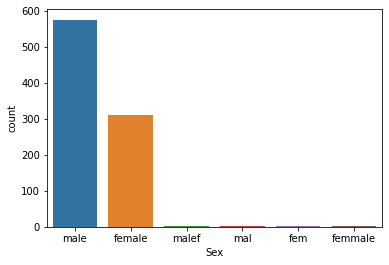

In [18]:
sns.countplot(data=df, x="Sex")

<AxesSubplot:xlabel='SibSp', ylabel='count'>

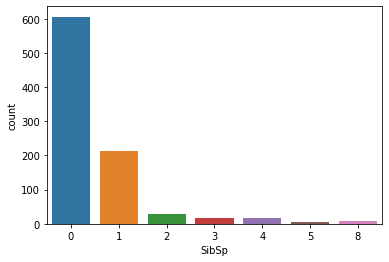

In [19]:
sns.countplot(data=df, x="SibSp")

<AxesSubplot:xlabel='Parch', ylabel='count'>

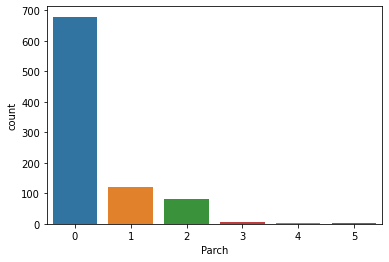

In [20]:
sns.countplot(data=df, x="Parch")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

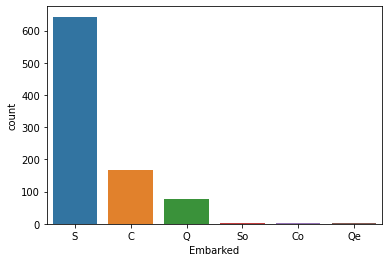

In [21]:
sns.countplot(data=df, x="Embarked")

In [22]:
df["Age"].describe()

count     719.000000
mean       35.929166
std       165.148008
min       -12.000000
25%        20.000000
50%        28.000000
75%        38.000000
max      4435.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age'>

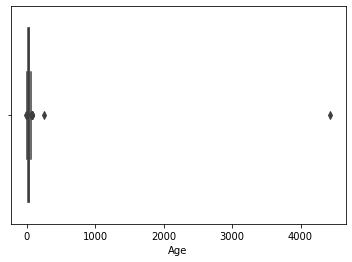

In [23]:
sns.boxplot(x=df["Age"])

In [24]:
df["Fare"].describe()

count    891.000000
mean      32.092339
std       49.894634
min      -90.000000
25%        7.895800
50%       14.454200
75%       30.847900
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare'>

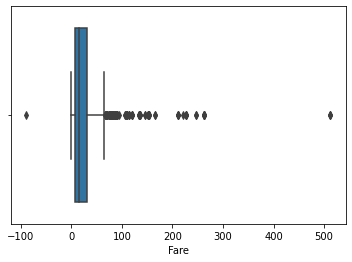

In [25]:
sns.boxplot(x=df["Fare"])

## Exploration summary

| Column      | Comment                                                                                               | Solution                                                        |
|-------------|-------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------|
| PassengerId | Has duplicated values                                                                                 | Rows with duplicated values can be removed                      |
| Survived    | Has two unique values, seems to be ok                                                                 |                                                                 |
| Pclass      | Has three unique values, seems to be ok                                                               |                                                                 |
| Name        | Has duplicated values                                                                                 | Rows with duplicated values can be removed                      |
| Sex         | Has invalid values, with typos: "malef", "mal", "fem", "femmale"                                      | Invalid values can be merged with main ones: "male", "female"   |
| Age         | Has missing and invalid values which include: negative (-12) and out of bounds for a human age (4435) | Rows with invalid or missing values can be dropped              |
| SibSp       | Has seven unique values, seems to be ok                                                               |                                                                 |
| Parch       | Has six unique values, seems to be ok                                                                 |                                                                 |
| Ticket      | Not checked                                                                                           |                                                                 |
| Fare        | Has negative values and one non-numeric value                                                         | Rows with negative and invalid values can be dropped            |
| Cabin       | Has a lot of missing values (685)                                                                     | Column can be dropped                                           |
| Embarked    | Has invalid values, with different naming convention: "So", "Co", "Qe"                                | Invalid values could be merged with the main ones "S", "C", "Q" |
| ship        | All rows have the same value "Titanic"                                                                | Column can be dropped                                           |

# Cleaning

## Unecessary data

In [26]:
df = df.drop(columns=["ship"])

## Missing data

In [27]:
df = df.dropna(subset=["Age", "Fare", "Embarked"])

In [28]:
df = df.drop(columns=["Cabin"])

## Duplicated data

In [29]:
df = df.drop_duplicates(subset=["PassengerId"])
df = df.drop_duplicates(subset=["Name"])

## Invalid data

### Categorical data

In [31]:
sex_mapping = {
    "malef": "male",
    "mal": "male",
    "femmale": "female",
}

df["Sex"] = df["Sex"].replace(sex_mapping)

In [32]:
embarked_mapping = {
    "So": "S",
    "Co": "C",
    "Qe": "Q",
}

df["Embarked"] = df["Embarked"].replace(embarked_mapping)

### Numeric data

In [33]:
df = df[df["Age"].between(0, 115)]

In [34]:
df = df[df["Fare"].between(0, 600)]

# Output

In [35]:
df.to_csv("data/TitanicCleaned.tsv", sep = '\t', index=False)